In [11]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df2=pd.read_csv('data/df2.csv')
df2

,yj21b,yj6.2,yj10.2,yj13.2,yj1.1.1,yj72.18a
0,42.0,40.0,11572.206741,25000.0,3.0,2.0
1,21.0,60.0,8205.665614,18000.0,4.0,2.0
2,19.0,48.0,4229.458428,30000.0,4.0,1.0
3,28.0,40.0,2053.307000,38000.0,1.0,3.0
4,28.0,40.0,4102.242173,40000.0,1.0,3.0
...,...,...,...,...,...,...
3397,28.0,48.0,12988.193531,30000.0,2.0,2.0
3398,27.0,60.0,5183.598416,35000.0,3.0,1.0
3399,14.0,40.0,8382.187148,20000.0,3.0,2.0
3400,28.0,40.0,8167.341087,53000.0,2.0,2.0


## Корреляционная матрица и диаграммы рассеяния

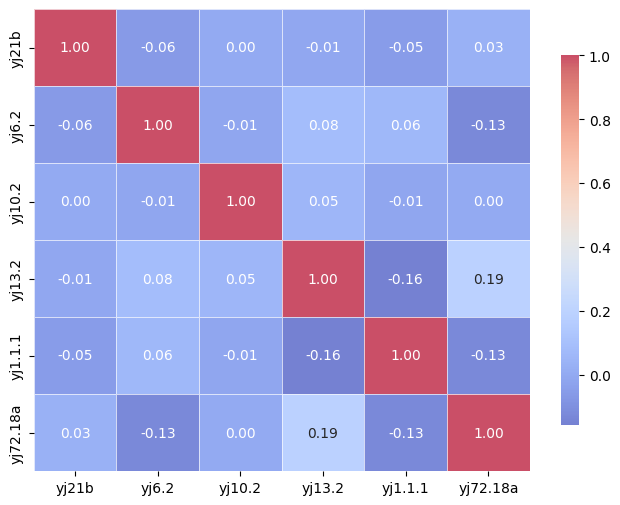

In [3]:
correlation_matrix = df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            cbar_kws={'shrink': 0.8}, alpha=0.7)

#plt.savefig('sfdfdf.png',dpi=300)
plt.show()

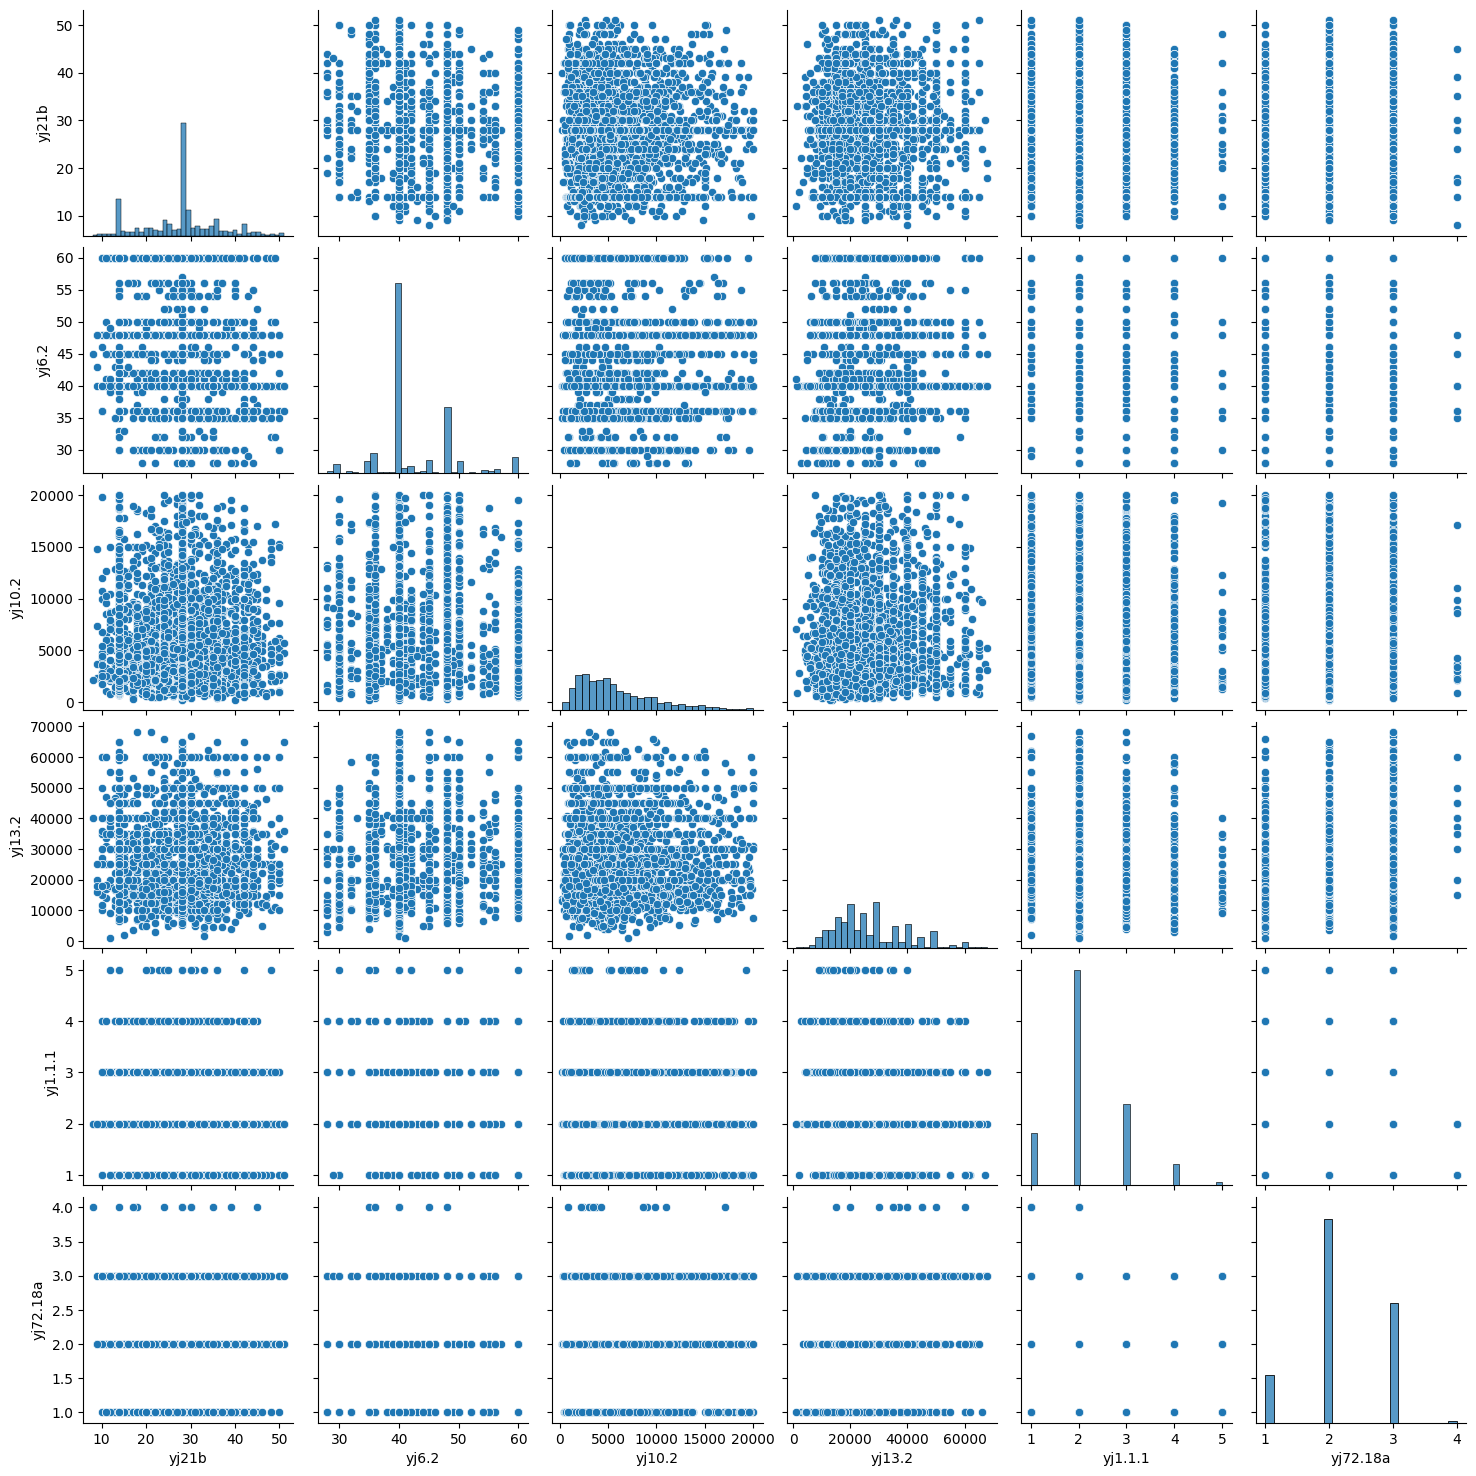

In [4]:
sns.pairplot(df2)
#plt.savefig('sfdfdfвв.png',dpi=300)
plt.show()

## Выявление мультиколлинеарности

In [5]:
X = add_constant(df2) # добавляется константа для учета свободного члена в модели
X=X.drop('yj1.1.1', axis=1)

# расчет VIF
vif_data = pd.DataFrame()
vif_data["Переменная"] = X.columns
vif_data["Значение VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Переменная  Значение VIF
0      const     83.884977
1      yj21b      1.004420
2      yj6.2      1.032997
3     yj10.2      1.003237
4     yj13.2      1.053628
5   yj72.18a      1.060854


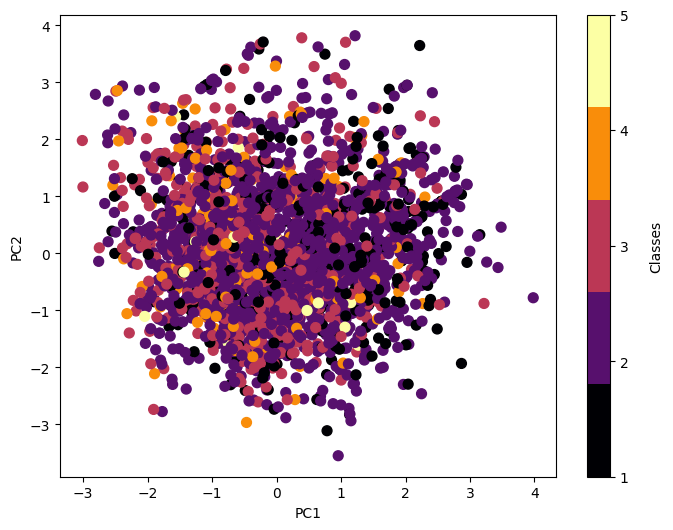

In [ ]:
X = df2.drop('yj1.1.1', axis=1)
y = df2['yj1.1.1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, y], axis=1)
colors = plt.get_cmap('inferno')(np.linspace(0, 1, 256))
cmap = LinearSegmentedColormap.from_list('CustomInferno', colors, N=5)

plt.figure(figsize=(8, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['yj1.1.1'], cmap=cmap, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')

cb = plt.colorbar(ticks=[1, 2, 3, 4, 5])
cb.set_ticklabels(['1', '2', '3', '4', '5'])
cb.ax.set_ylabel('Classes', rotation=90, labelpad=15)

#plt.savefig('dessfeferg.png', dpi=300)
plt.show()